In [2]:
#import
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym

In [3]:
def get_epsilon_greedy_action(q_values, epsilon, action_n):

    policy = np.ones(action_n) * epsilon / action_n
    max_action = np.argmax(q_values)
    policy[max_action] += 1 - epsilon

    return np.random.choice(np.arange(action_n), p=policy)

In [4]:
def QLearning(env, episode_n, noisy_episode_n, gamma=0.99, t_max=500, alpha=0.5):
    state_n = env.observation_space.n  # Получаем количество состояний в среде
    action_n = env.action_space.n  # Получаем количество действий в среде
    Q = np.zeros((state_n, action_n))  # Создаем Q-функцию (матрицу состояние-действие) и инициализируем её нулями
    epsilon = 1  # Инициализируем действием рандомный шанс
    total_rewards = []  # Создаем массив для хранения общих вознаграждений для каждого эпизода
    for episode in range(episode_n):  # Запускаем цикл для каждого эпизода
        total_reward = 0  # Инициализируем общую сумму вознаграждений для каждого эпизода
        state, _ = env.reset()  # Инициализируем состояние и действие в среде
        for t in range(t_max):  # Запускаем цикл для каждого шага в эпизоде
            # Делаем действие с рандомным шансом epsilon
            action = get_epsilon_greedy_action(Q[state], epsilon, action_n)  # Делаем действие с шансом epsilo
            next_state, reward, done, _, _ = env.step(action)  # Делаем шаг в среде и получаем результат
            Q[state][action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state][action])  # Обновляем Q-функцию
            total_reward += reward  # Добавляем вознаграждение к общей сумме вознаграждений для эпизода
            if done:  # Если эпизод завершён, то выходим из цикла
                break
            state = next_state  # Обновляем состояние в среде
        epsilon = max(0, epsilon - 1 / noisy_episode_n)  # Обновляем действием шанс
        total_rewards.append(total_reward)  # Добавляем вознаграждение к общей сумме вознаграждений для эпизода
    return total_rewards, Q  # Возвращаем общие вознаграждения для каждого эпизода

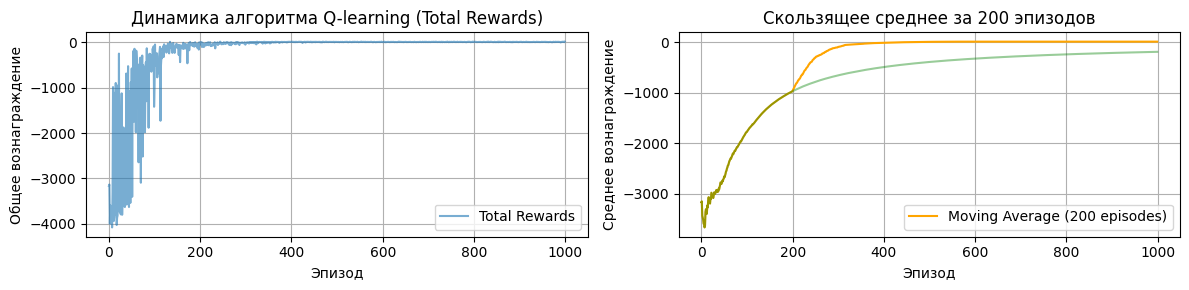


Статистика обучения:
Средняя награда за все эпизоды: -193.49
Средняя награда за последние 200 эпизодов: 7.58
Максимальная награда: 15
Минимальная награда: -4078


In [5]:
#make gym > q > plot
env = gym.make("Taxi-v3")
total_rewards, qfunction = QLearning(
    env, episode_n=1000, noisy_episode_n=400, t_max=1000, gamma=0.999, alpha=0.5
)

# Создаем две графика
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))

# График общей награды
ax1.plot(total_rewards, label="Total Rewards", alpha=0.6)
ax1.set_title("Динамика алгоритма Q-learning (Total Rewards)")
ax1.set_xlabel("Эпизод")
ax1.set_ylabel("Общее вознаграждение")
ax1.grid(True)
ax1.legend()

# Расчет скользящего среднего за последние 200 эпизодов
window_size = 200
rolling_mean = np.array(
    [
        np.mean(total_rewards[max(0, i - window_size) : i])
        for i in range(1, len(total_rewards) + 1)
    ]
)

# График скользящего среднего
ax2.plot(rolling_mean, label=f"Moving Average ({window_size} episodes)", color="orange")
ax2.set_title(f"Скользящее среднее за {window_size} эпизодов")
ax2.set_xlabel("Эпизод")
ax2.set_ylabel("Среднее вознаграждение")
ax2.grid(True)
ax2.legend()

# Добавляем накопленную сумму наград
cumulative_rewards = np.cumsum(total_rewards)
ax2.plot(
    cumulative_rewards / np.arange(1, len(total_rewards) + 1),
    label="Cumulative Average",
    color="green",
    alpha=0.4,
)

plt.tight_layout()
plt.show()

# Выводим статистику
print(f"\nСтатистика обучения:")
print(f"Средняя награда за все эпизоды: {np.mean(total_rewards):.2f}")
print(
    f"Средняя награда за последние {window_size} эпизодов: {np.mean(total_rewards[-window_size:]):.2f}"
)
print(f"Максимальная награда: {np.max(total_rewards)}")
print(f"Минимальная награда: {np.min(total_rewards)}")

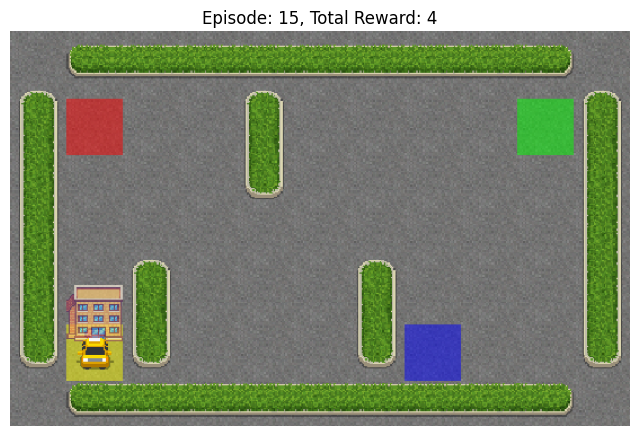

In [6]:
# test animation 15ep.
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import time


def render_taxi_animated(env, qfunction, episodes=1):
    plt.figure(figsize=(8, 6))
    img = None

    for episode in range(episodes):
        state = env.reset()[0]
        total_reward = 0
        done = False

        while not done:
            action = np.argmax(qfunction[state])
            next_state, reward, done, _, _ = env.step(action)
            total_reward += reward

            frame = env.render()

            if img is None:
                img = plt.imshow(frame)
                plt.axis("off")
            else:
                img.set_data(frame)

            plt.title(f"Episode: {episode + 1}, Total Reward: {total_reward}")
            display.clear_output(wait=True)
            display.display(plt.gcf())
            time.sleep(0.1)

            state = next_state

            if total_reward < -50:
                break

    plt.close()

env = gym.make("Taxi-v3", render_mode="rgb_array")
render_taxi_animated(env, qfunction, episodes=15)
env.close()